In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/NNDL/HW Extra

Mounted at /content/drive
/content/drive/MyDrive/NNDL/HW Extra


# load dataset

In [2]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# preprocces

scale amount and drop time

In [3]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

scaler = MinMaxScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [4]:
scaled_amount = df['scaled_amount']

df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.005824,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.000105,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,0.014739,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.004807,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.002724,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


train test val

In [5]:
import numpy as np


X = df.drop('Class', axis=1)
y = df['Class']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (284807, 29)
Shape of y: (284807,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Number transactions X_val dataset: ", X_val.shape)
print("Number transactions y_val dataset: ", y_val.shape)

Number transactions X_train dataset:  (182276, 29)
Number transactions y_train dataset:  (182276,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)
Number transactions X_val dataset:  (45569, 29)
Number transactions y_val dataset:  (45569,)


one-hot encoding y

In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)
y_val = to_categorical(y_val, num_classes = 2)
print(y_train[0 : 2, :])

[[1. 0.]
 [1. 0.]]


# classifier

## train

In [ ]:
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback, TensorBoard
from tensorflow.keras.utils import to_categorical

In [ ]:
inp_layer = Input(shape = (29,))
hidden_layer1 = Dense(units = 22, activation = 'relu')(inp_layer)
hidden_layer2 = Dense(units = 15, activation = 'relu')(hidden_layer1)
hidden_layer3 = Dense(units = 10, activation = 'relu')(hidden_layer2)
hidden_layer4 = Dense(units = 5, activation = 'relu')(hidden_layer3)
out_layer = Dense(units = 2, activation = 'softmax')(hidden_layer4)

Classifier = Model(inputs = inp_layer, outputs = out_layer)
Classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 22)                660       
                                                                 
 dense_1 (Dense)             (None, 15)                345       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 2)                 12        
                                                                 
Total params: 1,232
Trainable params: 1,232
Non-trainable par

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

opt = Adam(learning_rate=0.001)
loss = binary_crossentropy
Classifier.compile(optimizer=opt, loss = loss, metrics = 'acc')

In [ ]:
import h5py
from keras.callbacks import ModelCheckpoint, EarlyStopping

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_withoutSMOTE.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
results_Classifier = Classifier.fit(X_train, y_train,
                            batch_size=1024,
                            epochs=57,
                            validation_data = (X_val, y_val),
                            #shuffle=True,
                            callbacks=[mc])

Epoch 1/57
168/179 [===========================>..] - ETA: 0s - loss: 0.3288 - acc: 0.9599
Epoch 1: val_loss improved from inf to 0.00916, saving model to best_model_withoutSMOTE.h5
179/179 [==============================] - 2s 7ms/step - loss: 0.3107 - acc: 0.9620 - val_loss: 0.0092 - val_acc: 0.9981
Epoch 2/57
178/179 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.9984
Epoch 2: val_loss improved from 0.00916 to 0.00440, saving model to best_model_withoutSMOTE.h5
179/179 [==============================] - 1s 5ms/step - loss: 0.0059 - acc: 0.9984 - val_loss: 0.0044 - val_acc: 0.9983
Epoch 3/57
178/179 [============================>.] - ETA: 0s - loss: 0.0043 - acc: 0.9989
Epoch 3: val_loss improved from 0.00440 to 0.00360, saving model to best_model_withoutSMOTE.h5
179/179 [==============================] - 1s 5ms/step - loss: 0.0043 - acc: 0.9989 - val_loss: 0.0036 - val_acc: 0.9993
Epoch 4/57
165/179 [==========================>...] - ETA: 0s - loss: 0.0036 - acc:

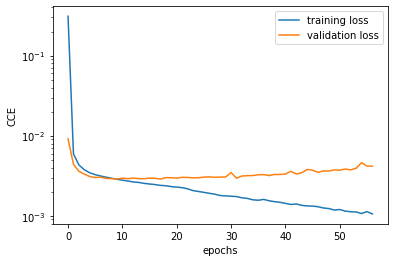

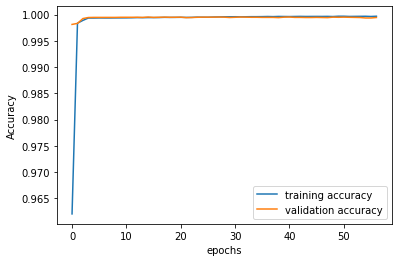

In [ ]:
import matplotlib.pyplot as plt

train_loss = results_Classifier.history['loss']
val_loss = results_Classifier.history['val_loss']

plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('CCE')
plt.show()

accuracy = results_Classifier.history['acc']
val_accuracy = results_Classifier.history['val_acc']

plt.plot(accuracy)
plt.plot(val_accuracy)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

## evaluation

In [8]:
from tensorflow.keras.models import load_model
Classifier = load_model('best_model_withoutSMOTE.h5')
Classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 22)                660       
                                                                 
 dense_1 (Dense)             (None, 15)                345       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
 dense_4 (Dense)             (None, 2)                 12        
                                                                 
Total params: 1,232
Trainable params: 1,232
Non-trainable par

In [ ]:
y_hat = np.argmax(Classifier.predict(X_test),axis=1)
test_labels = np.argmax(y_test, axis=1)

1781/1781 [==============================] - 2s 1ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.85      0.84      0.85       101

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



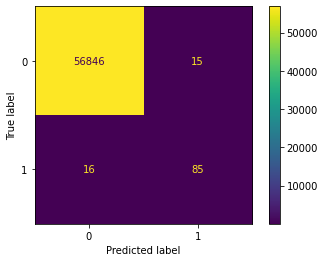

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_labels, y_hat)

In [9]:
y_hat = Classifier.predict(X_test)[:, 1]
test_labels = np.argmax(y_test, axis=1)

1781/1781 [==============================] - 2s 914us/step


In [10]:
from sklearn.metrics import confusion_matrix

x=500
AC=[]
REC=[]
TH=[]
for t in range(x):
    threshold = (t+1)/(x+1)
    #print(threshold)
    y_hat_int = (y_hat > threshold).astype(int)
    c_matrix = confusion_matrix(test_labels, y_hat_int)
    acc = (c_matrix[0,0]+c_matrix[1,1])/(sum(sum(c_matrix)))
    recall = c_matrix[1,1]/(c_matrix[1,1]+c_matrix[1,0])
    #print(acc)
    #print(recall)
    AC.append(acc)
    REC.append(recall)
    TH.append(threshold)

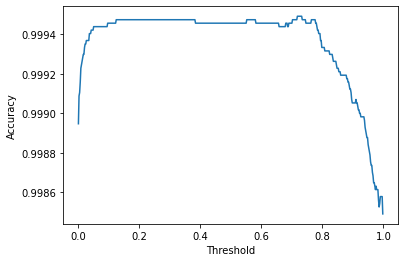

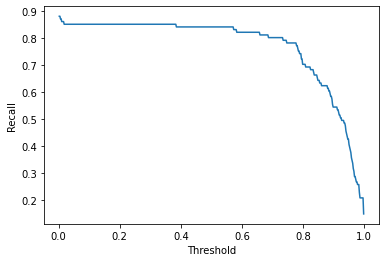

In [12]:
import matplotlib.pyplot as plt
plt.plot(TH,AC)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

plt.plot(TH,REC)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.show()